# **Individual Assingment BAPTISTE**: Default Credit Cards Clients

A bank in you region want to build a model to predict credit card defaulters more accurately in order minimize money loss. For this task we have a set of data on default payments and demographic data to help us do our task. Data is comprised in the following CSV files:


**TRAINING**

**`train_customers.csv`**
 - `ID`: ID of each client
 - `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
 - `SEX`: Gender (1=male, 2=female)
 - `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
 - `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
 - `AGE`: Age in years
 
**`train_series.csv`**
 - `ID`: ID of each client
 - `MONTH`: The month to wich data is refering
 - `PAY`: Repayment status in the corresponding month (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
 - `BILL_AMT`: Amount of bill statement in the corresponding month (NT dollar)
 - `PAY_AMT`: Amount of previous payment in the corresponding month (NT dollar)
 
**`train_target.csv`**
 - `DEFAULT_JULY`: Default payment in July (1=yes, 0=no)
 
 
**TEST** (For PART 3)
 - **`test_data.csv`**
 
**SUBMISSION** (For PART 3)
 - **`submission_features.csv`**
 
**BACKUP**
 - **`train_data.csv`**

Load all data and answer the following questions

### **1. Loading the required libraries**

In [1]:
# Importing needed libraries

#Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from ydata_profiling import ProfileReport

#Analytics and ML Libraries
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, auc, accuracy_score, classification_report, precision_score, recall_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV


# Other Libraries
import pandas as pd
import numpy as np

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


*LOADING THE DATA*

In [2]:
# Load datasets as dataframes
test_data = pd.read_csv(r"C:\Users\bapri\Desktop\IE Work\PythonforDataAnalysis\test_data.csv")
submission_features = pd.read_csv(r"C:\Users\bapri\Desktop\IE Work\PythonforDataAnalysis\submission_features.csv")
train_customers = pd.read_csv(r"C:\Users\bapri\Desktop\IE Work\PythonforDataAnalysis\train_customers.csv")
train_data = pd.read_csv(r"C:\Users\bapri\Desktop\IE Work\PythonforDataAnalysis\train_data.csv")
train_target = pd.read_csv(r"C:\Users\bapri\Desktop\IE Work\PythonforDataAnalysis\train_target.csv")
train_series = pd.read_csv(r"C:\Users\bapri\Desktop\IE Work\PythonforDataAnalysis\train_series.csv")

### **3. Exploratory Data Analysis of the customers**

We will now begin with EDA (Exploratory Data Analysis), to understand the nature of the different data sets

In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 8000 non-null   int64  
 1   LIMIT_BAL          8000 non-null   float64
 2   SEX                8000 non-null   int64  
 3   EDUCATION          8000 non-null   int64  
 4   MARRIAGE           8000 non-null   int64  
 5   AGE                8000 non-null   int64  
 6   PAY_JUNE           8000 non-null   int64  
 7   PAY_MAY            8000 non-null   int64  
 8   PAY_APRIL          8000 non-null   int64  
 9   PAY_MARCH          8000 non-null   int64  
 10  PAY_FEBRUARY       8000 non-null   int64  
 11  PAY_JANUARY        8000 non-null   int64  
 12  BILL_AMT_JUNE      8000 non-null   float64
 13  BILL_AMT_MAY       8000 non-null   float64
 14  BILL_AMT_APRIL     8000 non-null   float64
 15  BILL_AMT_MARCH     8000 non-null   float64
 16  BILL_AMT_FEBRUARY  8000 

In [37]:
test_data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_JUNE  PAY_MAY  \
0   7077   280000.0    2          1         2   29        -1       -1   
1   2924   170000.0    1          1         2   26        -1       -1   
2  24780   230000.0    2          3         1   37         1       -2   
3   7200   140000.0    2          3         1   38         2        2   
4  20591   150000.0    2          3         1   40        -1       -1   

   PAY_APRIL  PAY_MARCH  ...  BILL_AMT_MARCH  BILL_AMT_FEBRUARY  \
0         -1         -1  ...          1885.0              143.0   
1         -1         -1  ...          1591.0             3524.0   
2         -2         -2  ...             0.0             2533.0   
3          2          0  ...        120435.0           139795.0   
4         -1         -1  ...          5876.0             5496.0   

   BILL_AMT_JANUARY  PAY_AMT_JUNE  PAY_AMT_MAY  PAY_AMT_APRIL  PAY_AMT_MARCH  \
0            1250.0         788.0       1383.0         1890.0          143.0   
1            8545.0        1512.0       1362.0         1591.0         3524.0   
2               0.0           0.0          0.0            0.0         2533.0   
3          142950.0        6000.0          0.0         5000.0        21500.0   
4            5116.0        5876.0       5956.0         5876.0         5496.0   

   PAY_AMT_FEBRUARY  PAY_AMT_JANUARY  DEFAULT_JULY  
0            1253.0            316.0             0  
1            8545.0           1485.0             0  
2               0.0            500.0             0  
3            5500.0              0.0             0  
4            5116.0           5496.0             0  

[5 rows x 25 columns]

In [38]:
submission_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7000 non-null   int64  
 1   LIMIT_BAL          7000 non-null   float64
 2   SEX                7000 non-null   int64  
 3   EDUCATION          7000 non-null   int64  
 4   MARRIAGE           7000 non-null   int64  
 5   AGE                7000 non-null   int64  
 6   PAY_JUNE           7000 non-null   int64  
 7   PAY_MAY            7000 non-null   int64  
 8   PAY_APRIL          7000 non-null   int64  
 9   PAY_MARCH          7000 non-null   int64  
 10  PAY_FEBRUARY       7000 non-null   int64  
 11  PAY_JANUARY        7000 non-null   int64  
 12  BILL_AMT_JUNE      7000 non-null   float64
 13  BILL_AMT_MAY       7000 non-null   float64
 14  BILL_AMT_APRIL     7000 non-null   float64
 15  BILL_AMT_MARCH     7000 non-null   float64
 16  BILL_AMT_FEBRUARY  7000 

In [39]:
submission_features.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_JUNE  PAY_MAY  \
0   3644   130000.0    2          1         1   46         0        0   
1  15370   120000.0    2          5         1   57         0        0   
2  15570   500000.0    1          1         1   55         3        2   
3  16113    60000.0    1          2         2   28         2        2   
4  14220   220000.0    2          1         2   36         0        0   

   PAY_APRIL  PAY_MARCH  ...  BILL_AMT_APRIL  BILL_AMT_MARCH  \
0          0          0  ...         18932.0         22001.0   
1          0          0  ...         98109.0         74387.0   
2          2          2  ...          4957.0          4957.0   
3          2          0  ...         59892.0         60228.0   
4          2          0  ...          1522.0          5198.0   

   BILL_AMT_FEBRUARY  BILL_AMT_JANUARY  PAY_AMT_JUNE  PAY_AMT_MAY  \
0             3403.0            3859.0        1593.0       3000.0   
1            75237.0           78967.0        5000.0       5007.0   
2             4957.0            4957.0           0.0          0.0   
3            57969.0           55220.0        2800.0          0.0   
4             3974.0             -38.0        2190.0          1.0   

   PAY_AMT_APRIL  PAY_AMT_MARCH  PAY_AMT_FEBRUARY  PAY_AMT_JANUARY  
0         4000.0            0.0            3860.0            249.0  
1         5000.0         5000.0            5000.0           5000.0  
2            0.0            0.0               0.0              0.0  
3         3000.0         3000.0            3000.0          23000.0  
4         3980.0           20.0               0.0           7762.0  

[5 rows x 24 columns]

In [40]:
train_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         15000 non-null  int64  
 1   LIMIT_BAL  15000 non-null  float64
 2   SEX        15000 non-null  int64  
 3   EDUCATION  15000 non-null  int64  
 4   MARRIAGE   15000 non-null  int64  
 5   AGE        15000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 703.3 KB


In [41]:
train_customers.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE
0  15936   140000.0    2          1         1   39
1  15248    90000.0    2          2         1   49
2  27163   150000.0    2          1         1   37
3  13955   160000.0    1          3         1   38
4  23604   360000.0    1          2         1   28

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 15000 non-null  int64  
 1   LIMIT_BAL          15000 non-null  float64
 2   SEX                15000 non-null  int64  
 3   EDUCATION          15000 non-null  int64  
 4   MARRIAGE           15000 non-null  int64  
 5   AGE                15000 non-null  int64  
 6   PAY_JUNE           15000 non-null  int64  
 7   PAY_MAY            15000 non-null  int64  
 8   PAY_APRIL          15000 non-null  int64  
 9   PAY_MARCH          15000 non-null  int64  
 10  PAY_FEBRUARY       15000 non-null  int64  
 11  PAY_JANUARY        15000 non-null  int64  
 12  BILL_AMT_JUNE      15000 non-null  float64
 13  BILL_AMT_MAY       15000 non-null  float64
 14  BILL_AMT_APRIL     15000 non-null  float64
 15  BILL_AMT_MARCH     15000 non-null  float64
 16  BILL_AMT_FEBRUARY  150

In [43]:
train_data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_JUNE  PAY_MAY  \
0  15936   140000.0    2          1         1   39         1       -1   
1  15248    90000.0    2          2         1   49         1       -2   
2  27163   150000.0    2          1         1   37        -1       -1   
3  13955   160000.0    1          3         1   38         0        0   
4  23604   360000.0    1          2         1   28        -2       -1   

   PAY_APRIL  PAY_MARCH  ...  BILL_AMT_MARCH  BILL_AMT_FEBRUARY  \
0         -1         -1  ...          3260.0            32617.0   
1         -2         -1  ...          2146.0             2452.0   
2         -1          0  ...          1291.0             1193.0   
3          0          0  ...         15778.0             9333.0   
4          2          2  ...             0.0                0.0   

   BILL_AMT_JANUARY  PAY_AMT_JUNE  PAY_AMT_MAY  PAY_AMT_APRIL  PAY_AMT_MARCH  \
0           20506.0         797.0        190.0         3269.0        32617.0   
1            6990.0           0.0          0.0         2146.0         2452.0   
2            1914.0        1054.0        344.0         1193.0            0.0   
3            7083.0        2000.0       5060.0         5000.0         1500.0   
4               0.0        2500.0          0.0            0.0            0.0   

   PAY_AMT_FEBRUARY  PAY_AMT_JANUARY  DEFAULT_JULY  
0            5000.0           2774.0             0  
1            6990.0           3550.0             1  
2            3000.0              0.0             0  
3               0.0              0.0             0  
4               0.0              0.0             0  

[5 rows x 25 columns]

We should look more into these negative values regarding pay and see if there's any transformation to be done.

In [44]:
train_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        90000 non-null  int64  
 1   MONTH     90000 non-null  object 
 2   PAY       90000 non-null  float64
 3   BILL_AMT  90000 non-null  float64
 4   PAY_AMT   90000 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.4+ MB


In [45]:
train_series.head()

ID     MONTH  PAY  BILL_AMT  PAY_AMT
0  15936      JUNE  1.0       0.0    797.0
1  15936       MAY -1.0     797.0    190.0
2  15936     APRIL -1.0     190.0   3269.0
3  15936     MARCH -1.0    3260.0  32617.0
4  15936  FEBRUARY -1.0   32617.0   5000.0

In [46]:
train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            15000 non-null  int64
 1   DEFAULT_JULY  15000 non-null  int64
dtypes: int64(2)
memory usage: 234.5 KB


In [47]:
train_target.head()

ID  DEFAULT_JULY
0  15936             0
1  15248             1
2  27163             0
3  13955             0
4  23604             0

## **A. DATA ENGINEERING (3 points)**

### **Question 1**

(2 points)

In [3]:
# Pivot time-series data for numerical columns
transformed_series = train_series.pivot(index='ID', columns='MONTH', values=['PAY', 'BILL_AMT', 'PAY_AMT'])

# Concatenate numerical columns with the month
new_columns = ['{}_{}'.format(col[0], col[1]) for col in transformed_series.columns]

transformed_series.columns = new_columns
transformed_series.reset_index(inplace=True)

# Reorder columns in chronological order
chronological_columns = [
    'ID', 'PAY_JANUARY', 'PAY_FEBRUARY', 'PAY_MARCH', 'PAY_APRIL', 'PAY_MAY', 'PAY_JUNE',
    'BILL_AMT_JANUARY', 'BILL_AMT_FEBRUARY', 'BILL_AMT_MARCH', 'BILL_AMT_APRIL', 'BILL_AMT_MAY', 'BILL_AMT_JUNE',
    'PAY_AMT_JANUARY', 'PAY_AMT_FEBRUARY', 'PAY_AMT_MARCH', 'PAY_AMT_APRIL', 'PAY_AMT_MAY', 'PAY_AMT_JUNE'
]

transformed_series = transformed_series[chronological_columns]

transformed_series.head()


ID  PAY_JANUARY  PAY_FEBRUARY  PAY_MARCH  PAY_APRIL  PAY_MAY  PAY_JUNE  \
0   0          0.0          -1.0        0.0        0.0      0.0      -1.0   
1   1          0.0           0.0        0.0        0.0      0.0       0.0   
2   3         -2.0          -2.0       -2.0       -2.0     -2.0      -2.0   
3   4          0.0           0.0        0.0        0.0      0.0       0.0   
4   5          0.0           0.0        0.0        0.0      0.0       0.0   

   BILL_AMT_JANUARY  BILL_AMT_FEBRUARY  BILL_AMT_MARCH  BILL_AMT_APRIL  \
0           18697.0            44024.0             0.0         13600.0   
1           49470.0            50372.0         50875.0         53169.0   
2               0.0                0.0             0.0             0.0   
3            9617.0             9417.0          9225.0          9044.0   
4           36524.0            35704.0         45402.0         44412.0   

   BILL_AMT_MAY  BILL_AMT_JUNE  PAY_AMT_JANUARY  PAY_AMT_FEBRUARY  \
0       24391.0        28991.0          10000.0             680.0   
1       70073.0        75662.0           2006.0            1903.0   
2         735.0        23570.0              0.0               0.0   
3        8034.0         8214.0            330.0             356.0   
4       49592.0        50840.0           1387.0            1254.0   

   PAY_AMT_MARCH  PAY_AMT_APRIL  PAY_AMT_MAY  PAY_AMT_JUNE  
0        22373.0            0.0       1000.0        1300.0  
1         1603.0         2000.0       2106.0        3212.0  
2            0.0            0.0          0.0         742.0  
3          341.0          331.0       1150.0        1140.0  
4         1139.0         1837.0       1847.0        2100.0

### **Question 2**

(0.5 points)

In [4]:
# Merge the transformed time-series data with customer information
merged_series_customers = pd.merge(transformed_series, train_customers, on='ID')

merged_series_customers.head()


ID  PAY_JANUARY  PAY_FEBRUARY  PAY_MARCH  PAY_APRIL  PAY_MAY  PAY_JUNE  \
0   0          0.0          -1.0        0.0        0.0      0.0      -1.0   
1   1          0.0           0.0        0.0        0.0      0.0       0.0   
2   3         -2.0          -2.0       -2.0       -2.0     -2.0      -2.0   
3   4          0.0           0.0        0.0        0.0      0.0       0.0   
4   5          0.0           0.0        0.0        0.0      0.0       0.0   

   BILL_AMT_JANUARY  BILL_AMT_FEBRUARY  BILL_AMT_MARCH  ...  PAY_AMT_FEBRUARY  \
0           18697.0            44024.0             0.0  ...             680.0   
1           49470.0            50372.0         50875.0  ...            1903.0   
2               0.0                0.0             0.0  ...               0.0   
3            9617.0             9417.0          9225.0  ...             356.0   
4           36524.0            35704.0         45402.0  ...            1254.0   

   PAY_AMT_MARCH  PAY_AMT_APRIL  PAY_AMT_MAY  PAY_AMT_JUNE  LIMIT_BAL  SEX  \
0        22373.0            0.0       1000.0        1300.0    40000.0    2   
1         1603.0         2000.0       2106.0        3212.0    80000.0    2   
2            0.0            0.0          0.0         742.0   200000.0    2   
3          341.0          331.0       1150.0        1140.0    50000.0    1   
4         1139.0         1837.0       1847.0        2100.0    60000.0    2   

   EDUCATION  MARRIAGE  AGE  
0          2         2   26  
1          3         1   59  
2          2         1   41  
3          2         1   43  
4          2         2   24  

[5 rows x 24 columns]

### **Question 3**

(0.5 points)

In [5]:
# Merge the previously merged data with the target information
merged_data = pd.merge(merged_series_customers, train_target, on='ID')

# Sort the DataFrame by 'ID'
sorted_data = merged_data.sort_values(by='ID')

# Reset the index
sorted_data.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
sorted_data.head()


ID  PAY_JANUARY  PAY_FEBRUARY  PAY_MARCH  PAY_APRIL  PAY_MAY  PAY_JUNE  \
0   0          0.0          -1.0        0.0        0.0      0.0      -1.0   
1   1          0.0           0.0        0.0        0.0      0.0       0.0   
2   3         -2.0          -2.0       -2.0       -2.0     -2.0      -2.0   
3   4          0.0           0.0        0.0        0.0      0.0       0.0   
4   5          0.0           0.0        0.0        0.0      0.0       0.0   

   BILL_AMT_JANUARY  BILL_AMT_FEBRUARY  BILL_AMT_MARCH  ...  PAY_AMT_MARCH  \
0           18697.0            44024.0             0.0  ...        22373.0   
1           49470.0            50372.0         50875.0  ...         1603.0   
2               0.0                0.0             0.0  ...            0.0   
3            9617.0             9417.0          9225.0  ...          341.0   
4           36524.0            35704.0         45402.0  ...         1139.0   

   PAY_AMT_APRIL  PAY_AMT_MAY  PAY_AMT_JUNE  LIMIT_BAL  SEX  EDUCATION  \
0            0.0       1000.0        1300.0    40000.0    2          2   
1         2000.0       2106.0        3212.0    80000.0    2          3   
2            0.0          0.0         742.0   200000.0    2          2   
3          331.0       1150.0        1140.0    50000.0    1          2   
4         1837.0       1847.0        2100.0    60000.0    2          2   

   MARRIAGE  AGE  DEFAULT_JULY  
0         2   26             0  
1         1   59             0  
2         1   41             1  
3         1   43             0  
4         2   24             0  

[5 rows x 25 columns]

We will now put this modified dataset in a csv file, as required by the assignment rules.

In [6]:
# Save the sorted dataset to a CSV file
sorted_data.to_csv('RichardBaptiste_A_train.csv', index=False)

## **B. EXPLORATORY DATA ANALYSIS (2 points)**

Let's do some exploratory data analysis over the training data obtained from the previous part.

### **Question 1**

(0.5 points)

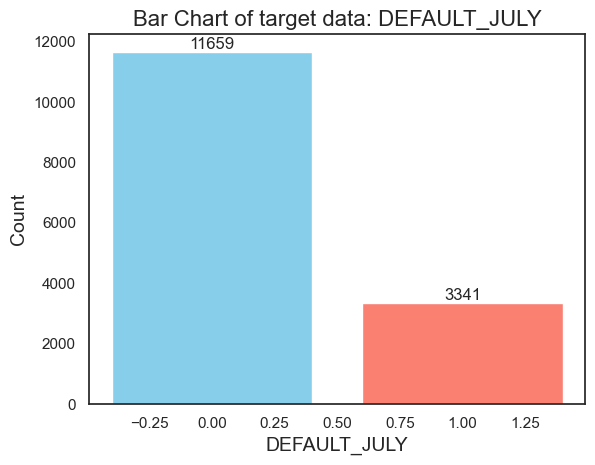

In [51]:
# We first count the occurrences of default
default_counts = sorted_data['DEFAULT_JULY'].value_counts()
bar_colors = ['skyblue' if x == 0 else 'salmon' for x in default_counts.index]

plt.bar(default_counts.index, default_counts.values, color=bar_colors)

for i, count in enumerate(default_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Bar Chart of target data: DEFAULT_JULY', fontsize=16)
plt.xlabel('DEFAULT_JULY', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

Looking at the target data, we can see that around 22.2% of individuals default in July, which is quite considerable, as it represents around 1/5th of the sample population. However, it also shows that the dataset is pretty unbalanced.

### **Question 2**

(0.5 points)

Plot the univariate distribution of all features:

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:


c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:


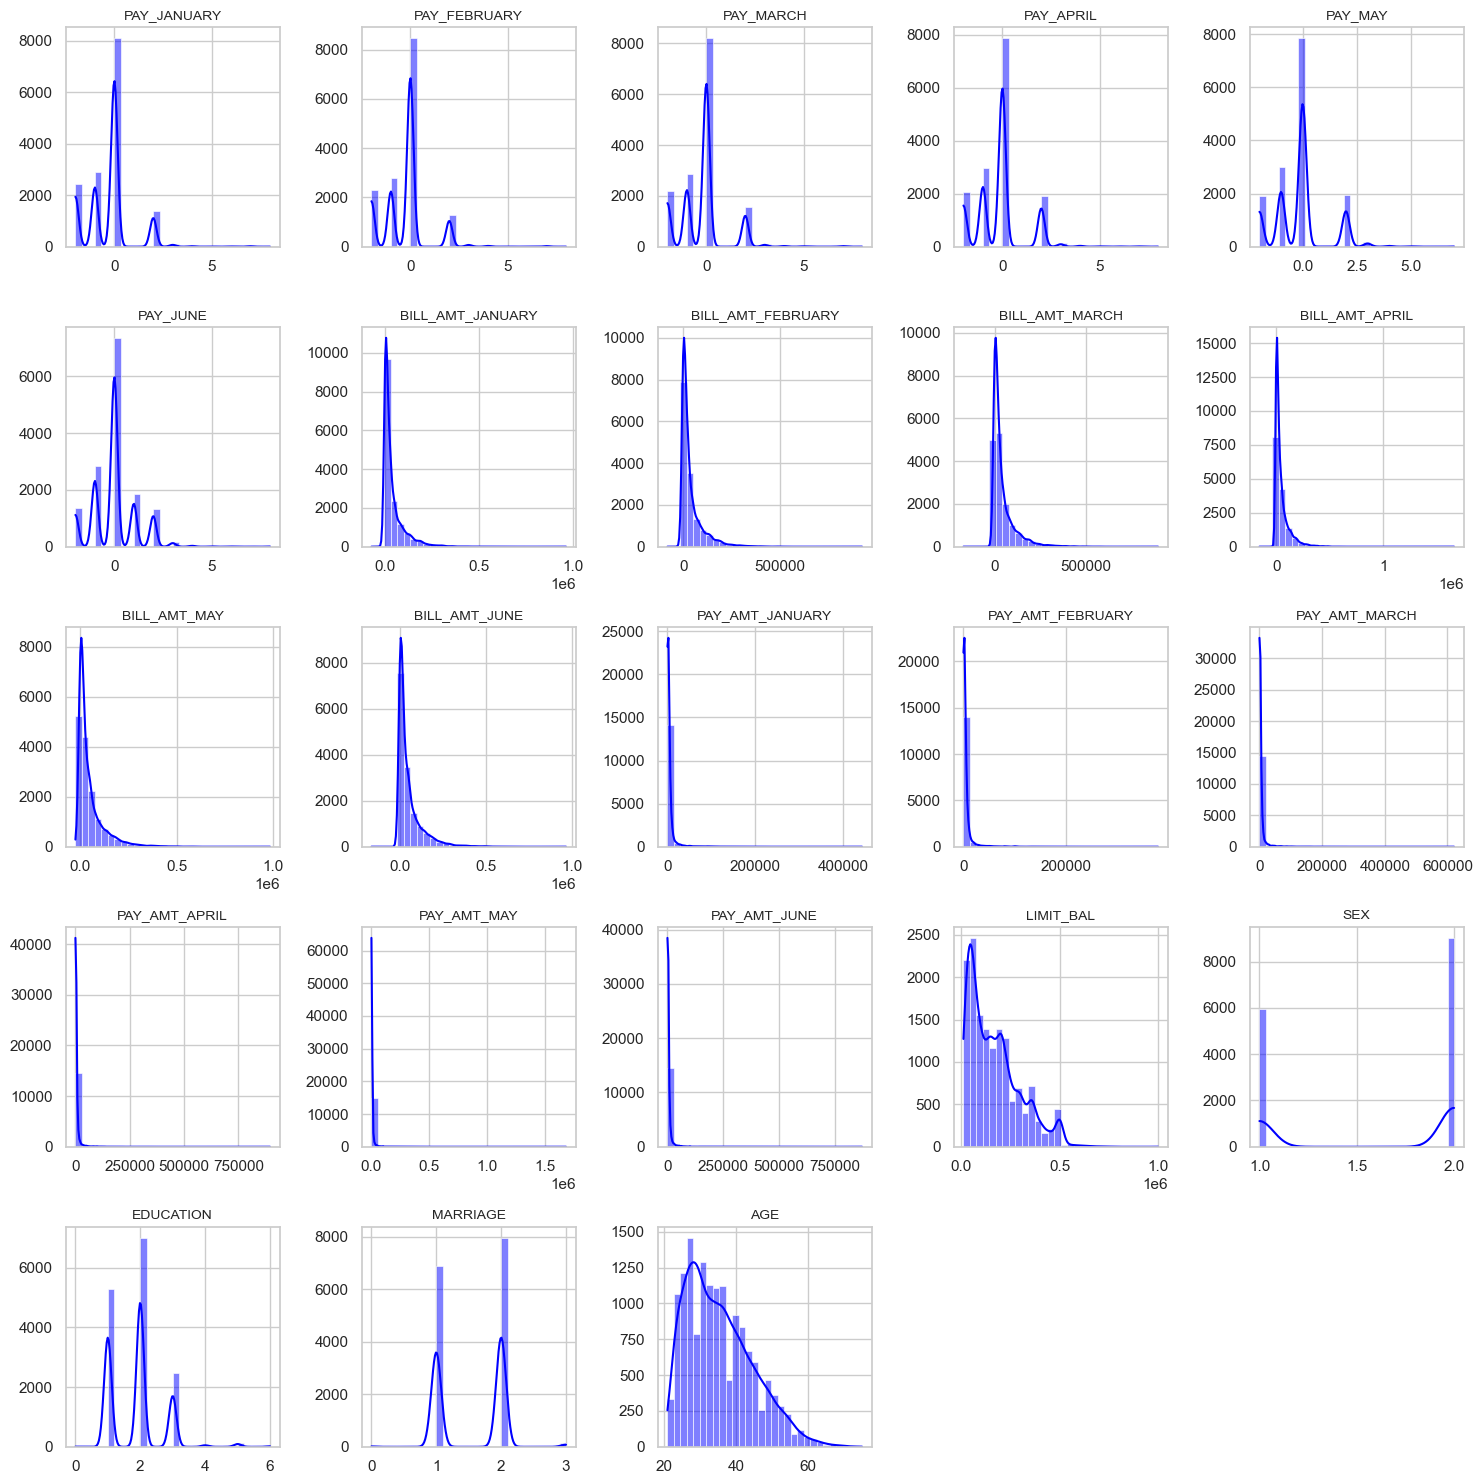

In [52]:
import math

sns.set(style="whitegrid")

# Select features to plot
features_to_plot = sorted_data.drop(['ID', 'DEFAULT_JULY'], axis=1)

num_features = len(features_to_plot.columns)
num_rows = math.ceil(num_features / 5)
num_cols = min(num_features, 5)

plt.figure(figsize=(15, 3 * num_rows))

for i, feature in enumerate(features_to_plot.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(sorted_data[feature], kde=True, color='blue', bins=30)
    plt.title(feature, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()

plt.show()


From the univariate analysis, we can already see now some of the most important variables that could later on explain the default status. For example the differences between bill amount and paid amount for each month.

Looking at the pay variable, we can also see that in June, although the max amount for y is lower than in the months leading up to it, the x axis has higher bars above 0 than the others, explaining there are a lot of people who have 1-3 months delay on their payment status.. explaining why they would be classified as defaulting in the next month. We could link this to the limit-pay variable, explaining a certain amount of credit given.

We can also see that most of the customer base is quite young and generally has an average level of education, explaining why some of these customers might have a harder time managing their money.

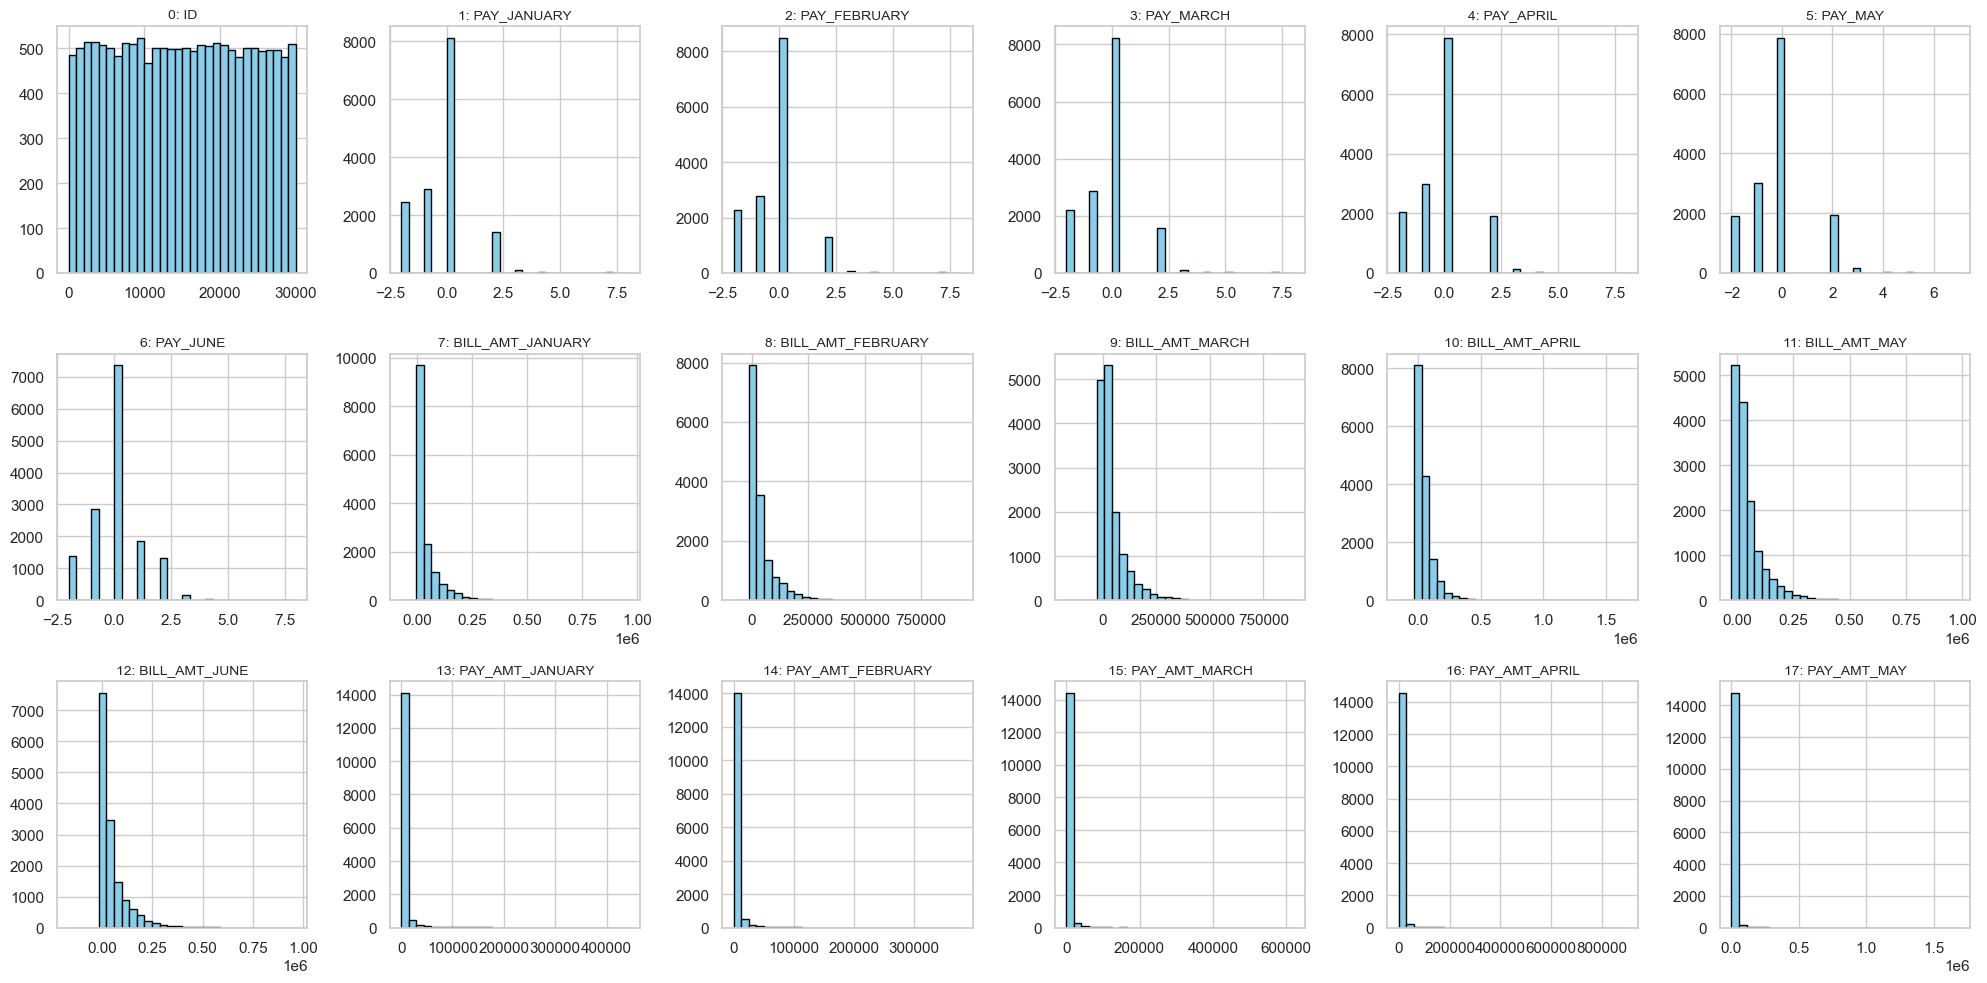

In [53]:
fig, axes = plt.subplots(3, 6, figsize=(20, 10))

for i, ax in enumerate(axes.ravel()):
    # Check if index is within the number of columns
    if i >= len(sorted_data.columns):
        ax.set_visible(False)
        continue

    
    ax.hist(sorted_data.iloc[:, i], bins=30, color='skyblue', edgecolor='black')

    
    ax.set_title("{}: {}".format(i, sorted_data.columns[i]), fontsize=10)

# Adjust layout
plt.tight_layout()

plt.show()


c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:


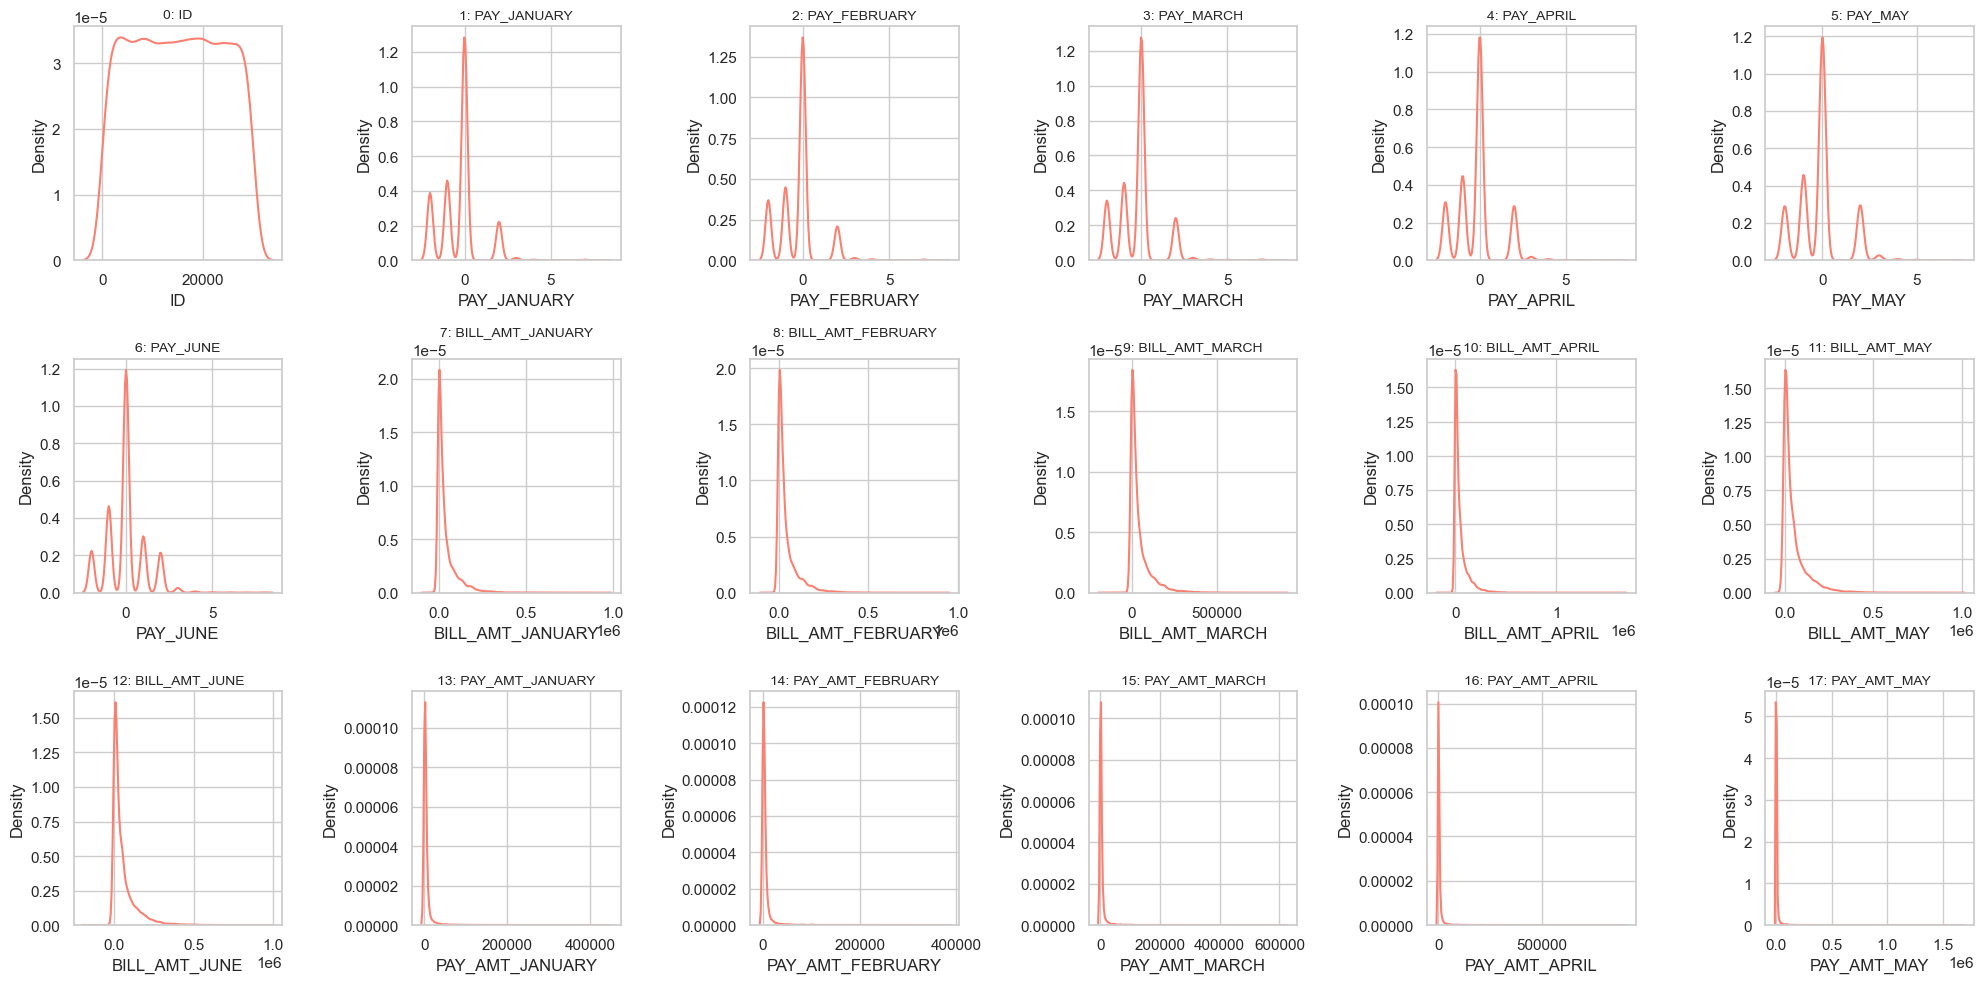

In [54]:
fig, axes = plt.subplots(3, 6, figsize=(20, 10))

for i, ax in enumerate(axes.ravel()):
    # Check if index is within the number of columns
    if i >= len(sorted_data.columns):
        ax.set_visible(False)
        continue

    # Plot KDE plot with modified color
    sns.kdeplot(sorted_data.iloc[:, i], color='salmon', ax=ax)

    # Set title for each subplot
    ax.set_title("{}: {}".format(i, sorted_data.columns[i]), fontsize=10)

plt.tight_layout()

plt.show()


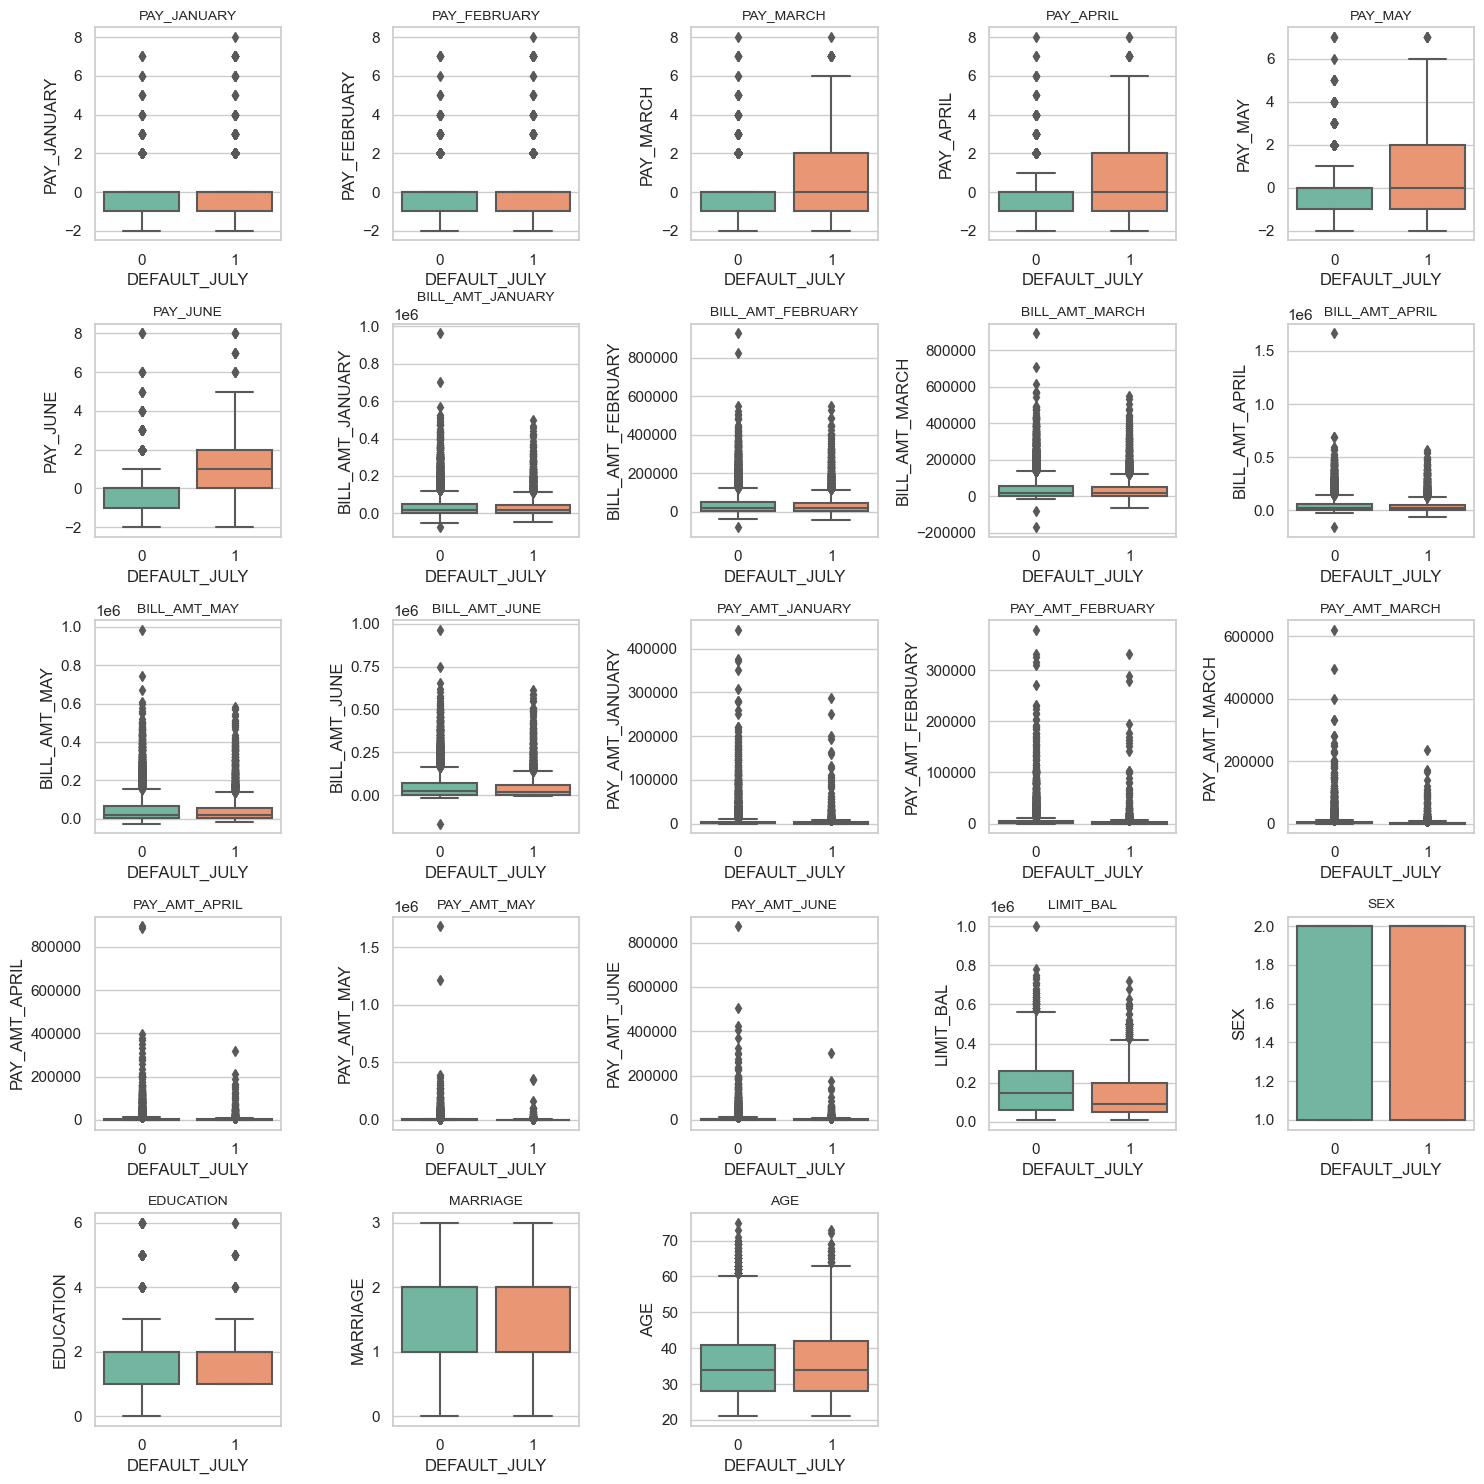

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Select numerical variables for boxplots (excluding 'ID' and 'DEFAULT_JULY')
numerical_variables = sorted_data.drop(['ID', 'DEFAULT_JULY'], axis=1)

sns.set(style="whitegrid")

num_variables = len(numerical_variables.columns)
num_rows = math.ceil(num_variables / 5)
num_cols = min(num_variables, 5)

plt.figure(figsize=(15, 3 * num_rows))

# Loop through each numerical variable and create a boxplot
for i, variable in enumerate(numerical_variables.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='DEFAULT_JULY', y=variable, data=sorted_data, palette='Set2')
    plt.title(variable, fontsize=10)

plt.tight_layout()

plt.show()


### **Question 3**

(1 point)

For the 3D plot, we will first do one choosing two June related variables because, as we will see below in the correlation matrix and feature importance plots, they are highly correlated with the target variable and these features explain quite a lot of the variations in the the July default status.

In [56]:
import plotly.graph_objects as go

def generate_3d_scatter_plot(month):
    # Filter data for the specified month columns and DEFAULT_JULY
    month_data = sorted_data[[f'PAY_{month}', f'BILL_AMT_{month}', f'PAY_AMT_{month}', 'DEFAULT_JULY']]
    
    # Separate data based on DEFAULT_JULY value
    default_0 = month_data[month_data['DEFAULT_JULY'] == 0]
    default_1 = month_data[month_data['DEFAULT_JULY'] == 1]

    # Create 3D scatter plot for DEFAULT_JULY = 0
    fig = go.Figure(data=[go.Scatter3d(
        x=default_0[f'PAY_{month}'],
        y=default_0[f'BILL_AMT_{month}'],
        z=default_0[f'PAY_AMT_{month}'],
        mode='markers',
        marker=dict(color='skyblue'),
        name='DEFAULT_JULY = 0'
    )])

    # Add data for DEFAULT_JULY = 1
    fig.add_trace(go.Scatter3d(
        x=default_1[f'PAY_{month}'],
        y=default_1[f'BILL_AMT_{month}'],
        z=default_1[f'PAY_AMT_{month}'],
        mode='markers',
        marker=dict(color='salmon'),
        name='DEFAULT_JULY = 1'
    ))

    # Update layout
    fig.update_layout(title=f'3D Scatter Plot of PAY_{month}, BILL_AMT_{month}, PAY_AMT_{month} with DEFAULT_JULY Differentiation',
                      scene=dict(xaxis_title=f'PAY_{month}',
                                  yaxis_title=f'BILL_AMT_{month}',
                                  zaxis_title=f'PAY_AMT_{month}'))

    # Show the plot
    fig.show()

# Call the function with the desired month
generate_3d_scatter_plot('JUNE')


Let's also do one to see if socio-economic background variables like education and marriage have any effect on credit defaulting

In [7]:
import plotly.express as px

variable1 = 'MARRIAGE'
variable2 = 'EDUCATION'
variable3 = 'DEFAULT_JULY'

# Create a 3D scatter plot
fig = px.scatter_3d(sorted_data, x=variable1, y=variable2, z=variable3, color=variable3,
                    symbol=variable3, opacity=0.7, size_max=10,
                    title='3D Scatter Plot with Marriage, Education, and Default in July')

# Show the plot
fig.show()


c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


Let's look at the **relationship between ALL features with each other**, using a pairplot:

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:


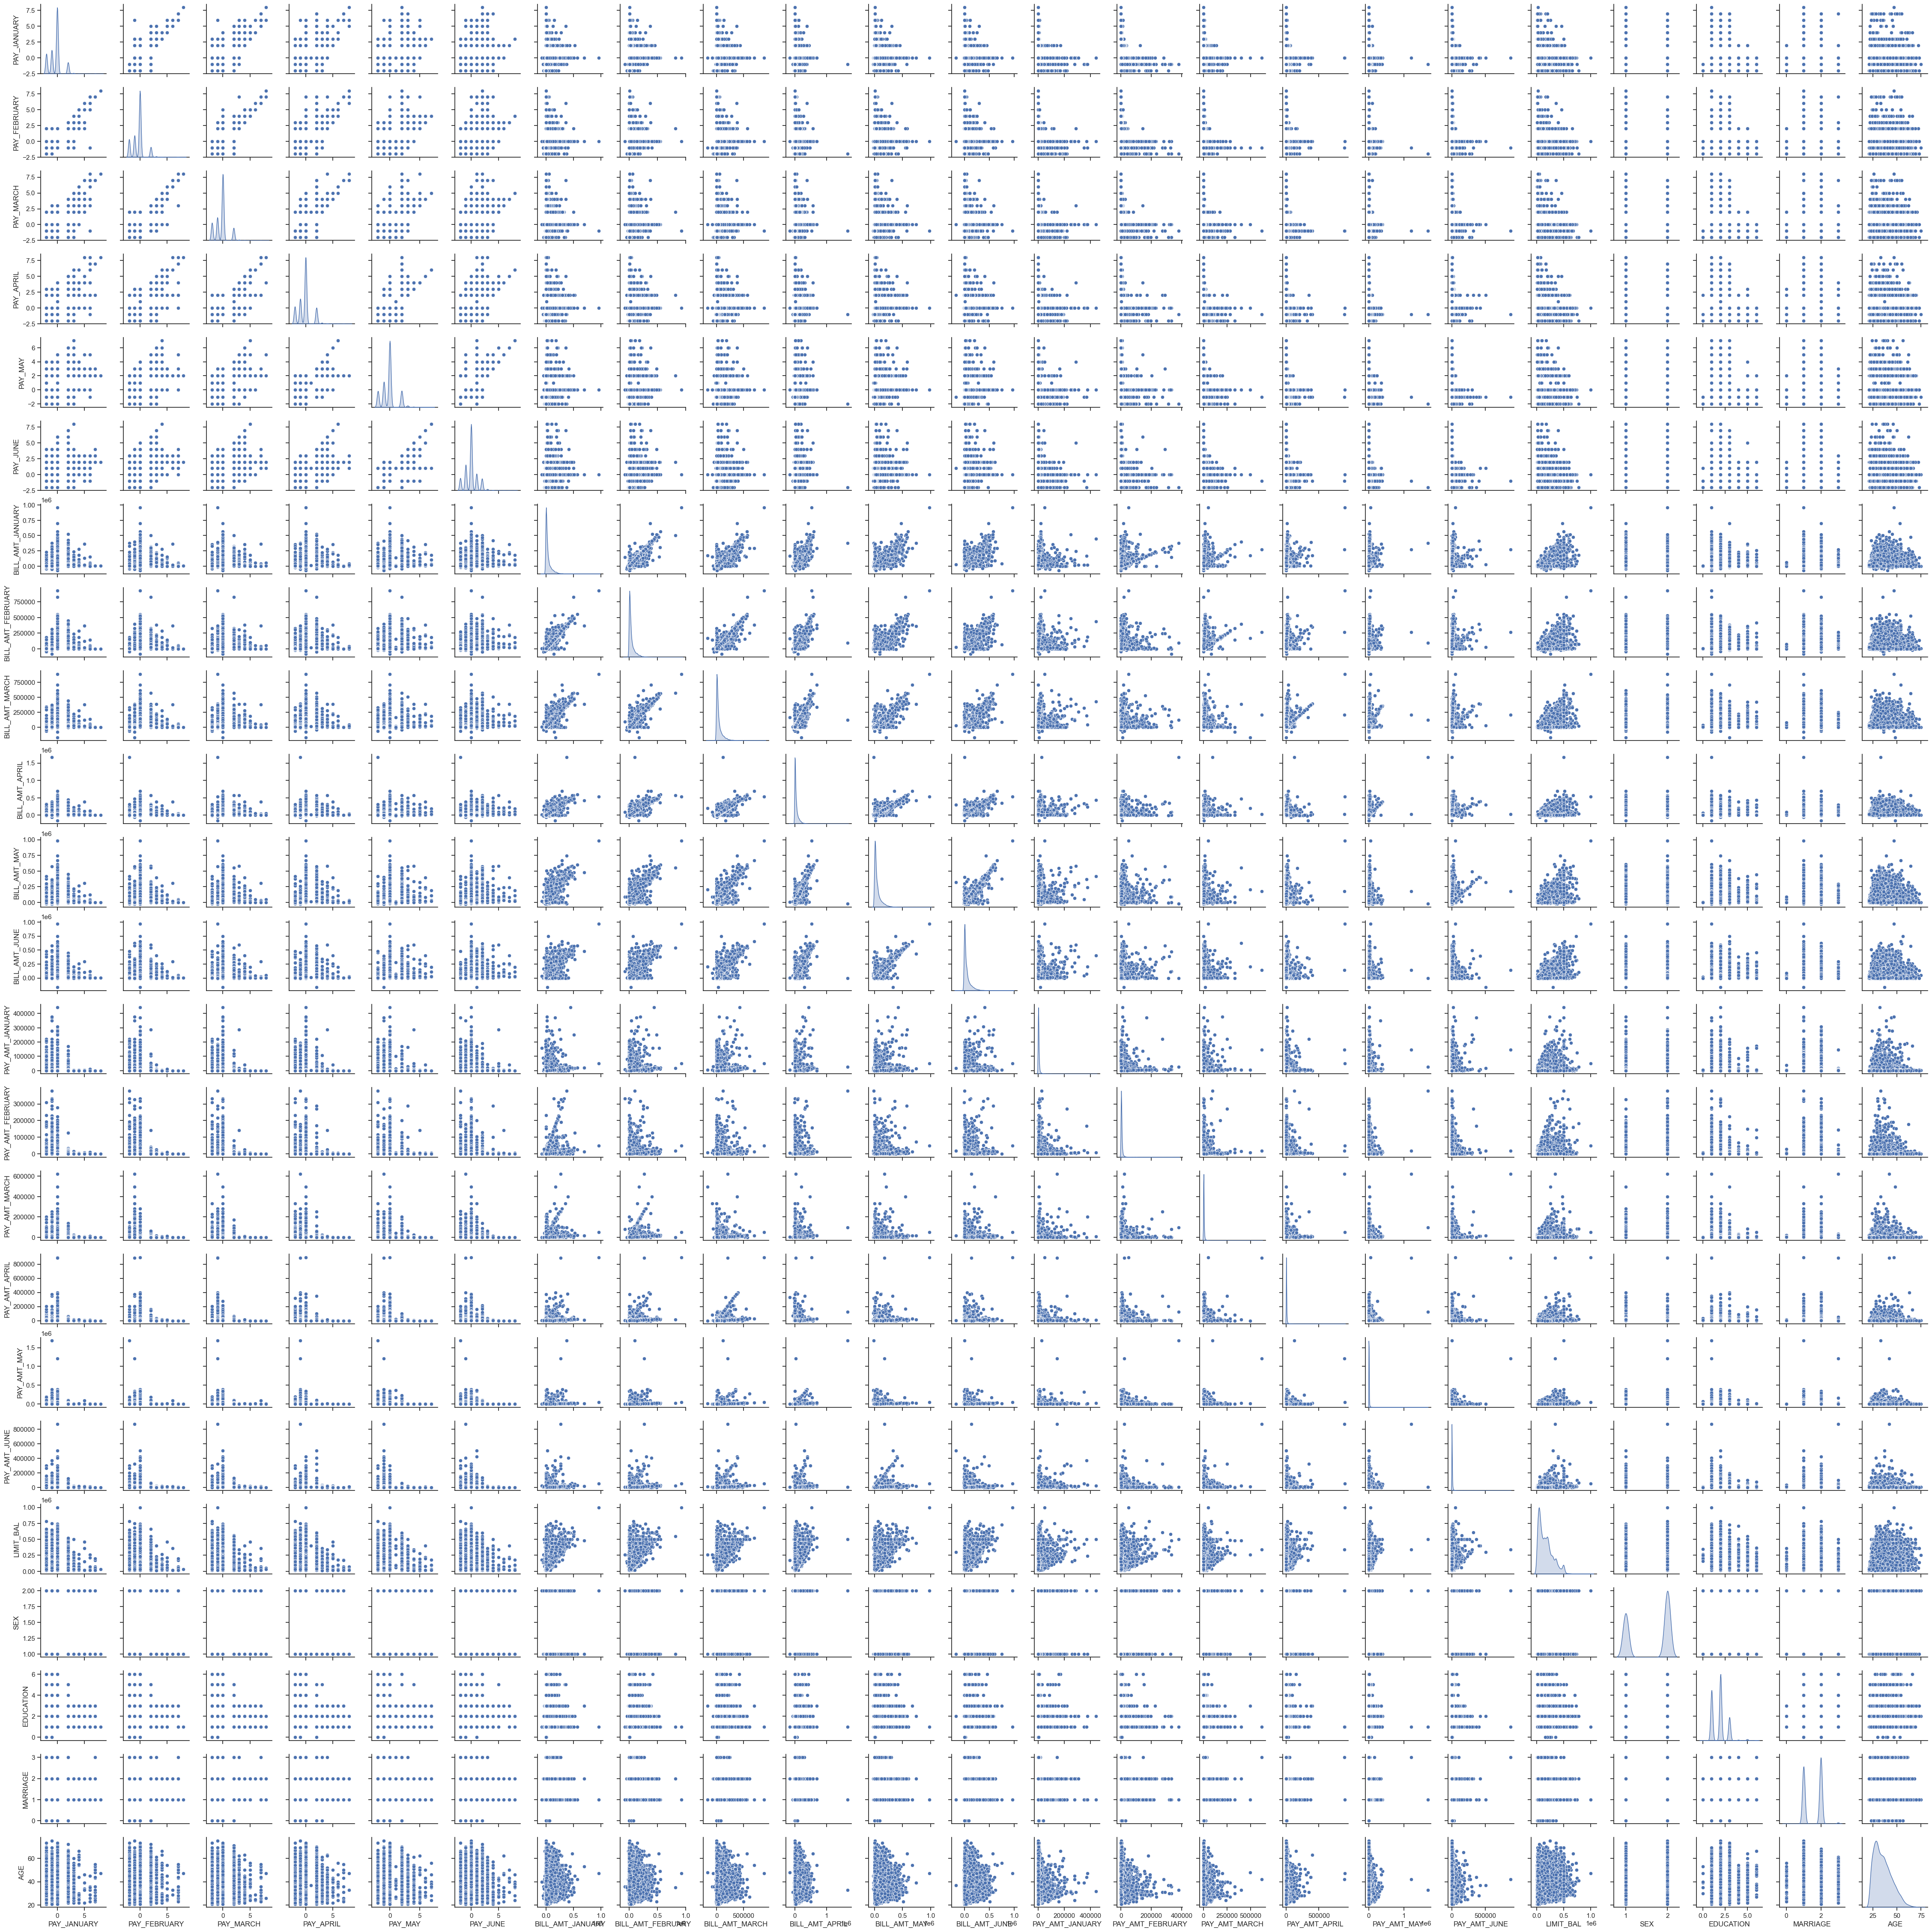

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for the pairplot (excluding 'ID' and 'DEFAULT_JULY')
numerical_features = sorted_data.select_dtypes(include='number').drop(['ID', 'DEFAULT_JULY'], axis=1)

# Set the style for the plots
sns.set(style="ticks")

# Create a pairplot
sns.pairplot(numerical_features, height=2, diag_kind="kde")

# Show the plot
plt.show()


The pair plot is similar to a Correlation Matrix, but plotted.
Many of these are irrelevant, however we can see some positive correlations around the center of the pairplot, which could explain quite a bit about the dataset.
Plotting a **correlation matrix** or heatmap would be a better alternative to visualize these trends and detect **multicollinearity**.


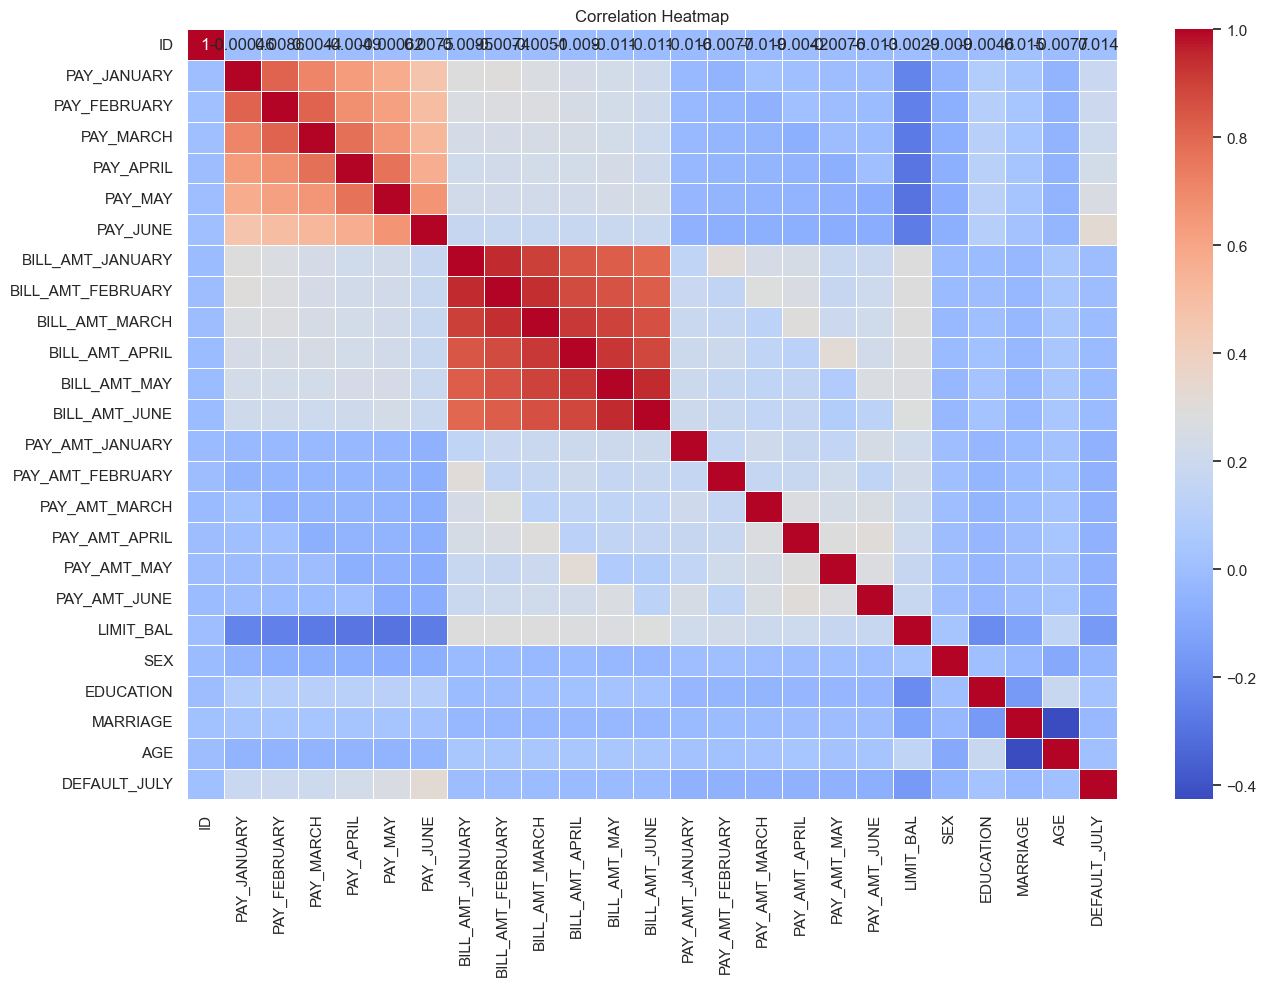

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = sorted_data.corr()

# Set the style for the plot
sns.set(style="white")

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Set the title of the plot
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


In [60]:
import plotly.express as px

# Calculate the correlation matrix
correlation_matrix = sorted_data.corr()

# Set a threshold for correlation magnitude
threshold = 0.6

# Filter the correlation matrix to show only correlations above the threshold
filtered_matrix = correlation_matrix.abs().mask(correlation_matrix.abs() <= threshold)

# Create a heatmap using Plotly
fig = px.imshow(filtered_matrix, labels=dict(color='Correlation'), x=filtered_matrix.columns, y=filtered_matrix.index, color_continuous_scale='Viridis')

# Set the title of the plot
fig.update_layout(title_text="Correlation Heatmap with Threshold (60%)")

# Show the plot
fig.show()


In [61]:
import plotly.express as px
import numpy as np

# Calculate the correlation matrix
correlation_matrix = sorted_data.corr().abs()

# Apply threshold
threshold = 0.6
correlation_masked = correlation_matrix.where(correlation_matrix > threshold, np.nan)

# Prepare annotation text, masking out entries below the threshold
annotation_text = correlation_masked.applymap(lambda entry: f'{entry:.2f}' if not np.isnan(entry) else '')

# Create a heatmap using Plotly Express
fig = px.imshow(
    correlation_masked.values,
    x=list(correlation_masked.columns),
    y=list(correlation_masked.index),
    labels=dict(color='Correlation'),
    color_continuous_scale='Blues'
)

# Update layout for better readability
fig.update_layout(
    title_text="Correlation Matrix with Threshold (60%)",
    xaxis=dict(tickangle=45, side='top', automargin=True),
    yaxis=dict(tickmode='array', automargin=True),
    autosize=False,
    width=1200,
    height=1200,
    margin=dict(l=150, r=150, b=100, t=235),
)

# Show the figure
fig.show()


C:\Users\bapri\AppData\Local\Temp\ipykernel_24796\1472046626.py:12: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Nothing too abnormal about these correlations. As we hover over the different squares, the months are more or less correlated correlated in a sense that makes sense chronologically.

## **C. MACHINE LEARNING (5 points)**

### **Question 1**

(2.5 points)

## **Feature engineering**

Let's add some variables that could be interesting to understand better the dataset:

In [62]:

# 2. Credit Utilization
sorted_data['CREDIT_UTILIZATION'] = sorted_data['BILL_AMT_JUNE'] / sorted_data['LIMIT_BAL']

# 3. Payment Status Aggregation (Taking the maximum delay across months)
sorted_data['MAX_PAYMENT_DELAY'] = sorted_data[['PAY_JANUARY', 'PAY_FEBRUARY', 'PAY_MARCH', 'PAY_APRIL', 'PAY_MAY', 'PAY_JUNE']].max(axis=1)

# 5. Income to Credit Ratio
sorted_data['INCOME_TO_CREDIT_RATIO'] = sorted_data['LIMIT_BAL'] / sorted_data['AGE']

# 6. Age and Payment Status Interaction
sorted_data['AGE_PAY_INTERACTION'] = sorted_data['AGE'] * sorted_data['MAX_PAYMENT_DELAY']

# 7. Bill Amount and Pay Amount Differences (Taking the difference between consecutive months)
for month in ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY']:
    sorted_data[f'BILL_PAY_DIFF_{month}'] = sorted_data[f'BILL_AMT_{month}'] - sorted_data[f'PAY_AMT_{month}']


# Display the updated dataframe
sorted_data.head()

ID  PAY_JANUARY  PAY_FEBRUARY  PAY_MARCH  PAY_APRIL  PAY_MAY  PAY_JUNE  \
0   0          0.0          -1.0        0.0        0.0      0.0      -1.0   
1   1          0.0           0.0        0.0        0.0      0.0       0.0   
2   3         -2.0          -2.0       -2.0       -2.0     -2.0      -2.0   
3   4          0.0           0.0        0.0        0.0      0.0       0.0   
4   5          0.0           0.0        0.0        0.0      0.0       0.0   

   BILL_AMT_JANUARY  BILL_AMT_FEBRUARY  BILL_AMT_MARCH  ...  DEFAULT_JULY  \
0           18697.0            44024.0             0.0  ...             0   
1           49470.0            50372.0         50875.0  ...             0   
2               0.0                0.0             0.0  ...             1   
3            9617.0             9417.0          9225.0  ...             0   
4           36524.0            35704.0         45402.0  ...             0   

   CREDIT_UTILIZATION  MAX_PAYMENT_DELAY  INCOME_TO_CREDIT_RATIO  \
0            0.724775                0.0             1538.461538   
1            0.945775                0.0             1355.932203   
2            0.117850               -2.0             4878.048780   
3            0.164280                0.0             1162.790698   
4            0.847333                0.0             2500.000000   

   AGE_PAY_INTERACTION  BILL_PAY_DIFF_JANUARY  BILL_PAY_DIFF_FEBRUARY  \
0                  0.0                 8697.0                 43344.0   
1                  0.0                47464.0                 48469.0   
2                -82.0                    0.0                     0.0   
3                  0.0                 9287.0                  9061.0   
4                  0.0                35137.0                 34450.0   

   BILL_PAY_DIFF_MARCH  BILL_PAY_DIFF_APRIL  BILL_PAY_DIFF_MAY  
0             -22373.0              13600.0            23391.0  
1              49272.0              51169.0            67967.0  
2                  0.0                  0.0              735.0  
3               8884.0               8713.0             6884.0  
4              44263.0              42575.0            47745.0  

[5 rows x 34 columns]

From this graph, we could therefore consider dropping some of the least important features.
It also interesting to see that 'PAY_JUNE' as well as some the features that we engineered ourselves are among some of the most important ones.

We tried it but will not be including it in the notebook as it complicates testing different models and forces re-running all the cells (long computation time) because we have to "run all" again every time otherwise the model gets confused on what we fitted our train AUC with when comparing with test AUC
We had tried with: columns_to_drop = ['ID', 'PAY_JANUARY', 'PAY_MARCH', 'SEX', 'MARRIAGE', 'EDUCATION']

This gave us a worse score so we will just drop ID and sex instead. 

Sex because it is very low in terms of feature importance and because it makes no sense for ID to be that high, so it might be offsetting or falsifying results

ROC AUC Score: 0.7466566502440941
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      2331
           1       0.65      0.35      0.46       669

    accuracy                           0.81      3000
   macro avg       0.74      0.65      0.67      3000
weighted avg       0.79      0.81      0.79      3000

Confusion Matrix:
 [[2202  129]
 [ 432  237]]


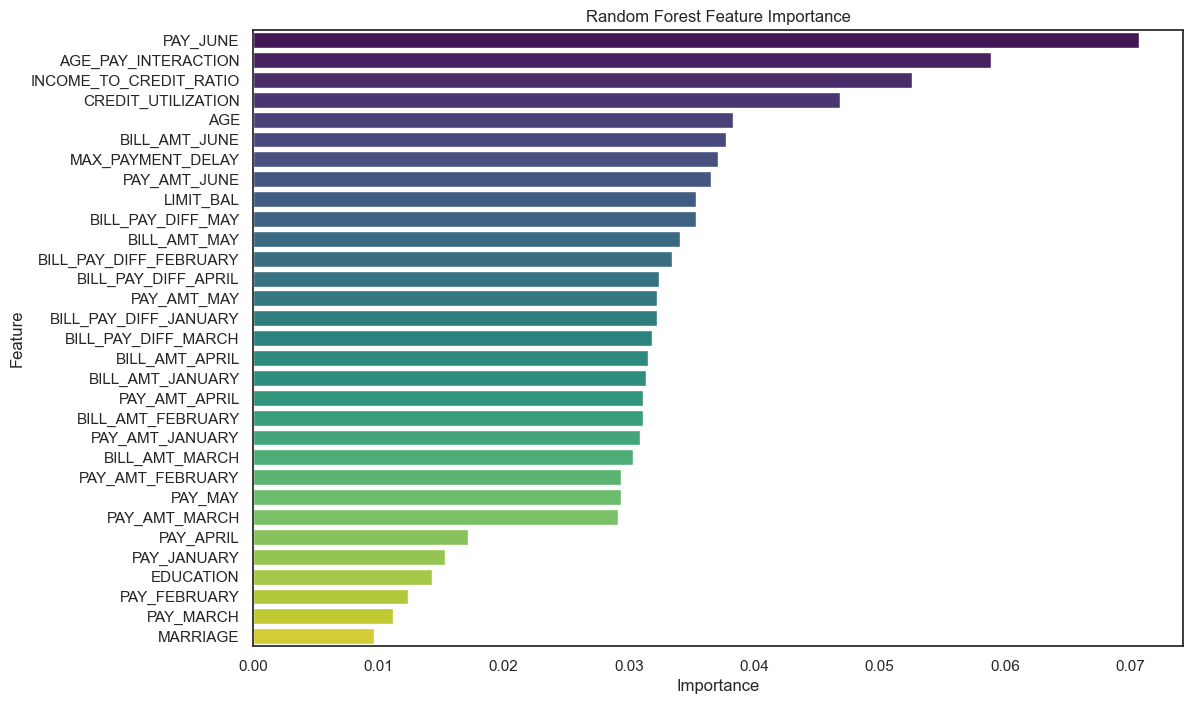

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

X = sorted_data.drop(['DEFAULT_JULY', 'ID', 'SEX'], axis=1)

y = sorted_data['DEFAULT_JULY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, (y_pred_proba > 0.5).astype(int)))
print("Confusion Matrix:\n", confusion_matrix(y_test, (y_pred_proba > 0.5).astype(int)))

# Visualize feature importance
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()


If we compare this feature importance plot with the one from our previous iteration (see raw cell), we can see that some features' importance has changed considerably.. Take a look at the AGE variable for example!

Now let's optimize!

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=50, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and their corresponding ROC AUC score
print("Best Parameters:", random_search.best_params_)
print("Best ROC AUC Score:", random_search.best_score_)

# Use the best model for predictions
best_rf_model = random_search.best_estimator_
y_pred_proba_best = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the best model
print("ROC AUC Score for the Best Model:", roc_auc_score(y_test, y_pred_proba_best))

Best Parameters: {'bootstrap': False, 'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 17, 'min_samples_split': 9, 'n_estimators': 172}
Best ROC AUC Score: 0.7846386248851974
ROC AUC Score for the Best Model: 0.76457495291576


Now let's test this model on the test data to check if there is any overfitting
(Let's not forget to do the FE on the test data to ensure symmetry between the datasets)

In [71]:
test_data = pd.read_csv('test_data.csv')

# Drop unnecessary columns
test_data.drop(['ID', 'SEX'], axis=1, inplace=True)

# Additional feature engineering steps
test_data['CREDIT_UTILIZATION'] = test_data['BILL_AMT_JUNE'] / test_data['LIMIT_BAL']
test_data['MAX_PAYMENT_DELAY'] = test_data[['PAY_JANUARY', 'PAY_FEBRUARY', 'PAY_MARCH', 'PAY_APRIL', 'PAY_MAY', 'PAY_JUNE']].max(axis=1)
test_data['INCOME_TO_CREDIT_RATIO'] = test_data['LIMIT_BAL'] / test_data['AGE']
test_data['AGE_PAY_INTERACTION'] = test_data['AGE'] * test_data['MAX_PAYMENT_DELAY']

for month in ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY']:
    test_data[f'BILL_PAY_DIFF_{month}'] = test_data[f'BILL_AMT_{month}'] - test_data[f'PAY_AMT_{month}']

# Ensure columns are in the same order as in the training data
X_test_final = test_data[X.columns]

# Use the best model obtained from RandomizedSearchCV for predictions
y_pred_proba_test = best_rf_model.predict_proba(X_test_final)[:, 1]

# Evaluate the model on the test set
test_auc_score = roc_auc_score(test_data['DEFAULT_JULY'], y_pred_proba_test)
print("ROC AUC Score on Test Set:", test_auc_score)


ROC AUC Score on Test Set: 0.7819605544040532


If test AUC is very close to train AUC, then we are doing good.

Next, see if utilizing **GridSearchCV** to find the ideal depth of the tree will help increase metrics.

This process required too much computational power for my computer.. so we will keep it as a raw cell

Therefore, in the cell below, we will try it with less options for the parameter grid

In [75]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid (we are not including too many options because it takes too much time and computational power )
param_grid = {
    'n_estimators': [50, 100],  
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [5, 10],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'bootstrap': [True]  
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and their corresponding ROC AUC score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

# Use the best model for predictions
best_rf_model_grid = grid_search.best_estimator_
y_pred_proba_best_grid = best_rf_model_grid.predict_proba(X_test)[:, 1]

# Evaluate the best model
print("ROC AUC Score for the Best Model with GridSearchCV:", roc_auc_score(y_test, y_pred_proba_best_grid))



c:\Users\bapri\Anaconda3\envs\pda-ie\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best ROC AUC Score: 0.7806722420276155
ROC AUC Score for the Best Model with GridSearchCV: 0.761931053410874


In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Define the parameter grid
param_grid = {'max_depth': range(10, 20)}

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
crossval_rf = GridSearchCV(random_forest, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# Fit the model to the training data
crossval_rf.fit(X_train, y_train)

# Print the best parameters set found on the train set
print("Best parameters set found on train set:")
print()
print(crossval_rf.best_params_)
print()

# Print grid scores on the train set
print("Grid scores on train set:")
print()
means = crossval_rf.cv_results_['mean_test_score']
stds = crossval_rf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, crossval_rf.cv_results_['params']):
    print("AUC = %0.3f (+/- %0.03f) for %r" % (mean, std * 2, params))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters set found on train set:

{'max_depth': 10}

Grid scores on train set:

AUC = 0.780 (+/- 0.018) for {'max_depth': 10}
AUC = 0.778 (+/- 0.021) for {'max_depth': 11}
AUC = 0.776 (+/- 0.020) for {'max_depth': 12}
AUC = 0.773 (+/- 0.019) for {'max_depth': 13}
AUC = 0.773 (+/- 0.019) for {'max_depth': 14}
AUC = 0.770 (+/- 0.023) for {'max_depth': 15}
AUC = 0.772 (+/- 0.024) for {'max_depth': 16}
AUC = 0.770 (+/- 0.021) for {'max_depth': 17}
AUC = 0.767 (+/- 0.022) for {'max_depth': 18}
AUC = 0.765 (+/- 0.020) for {'max_depth': 19}


As we can see, the optimal tree depth is 10, confirming the result of the previous cell too.

In [77]:

# We will split the training set into training and validation sets to try it out again
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Train the model with optimal tree depth on the training split
rf_classifier_optimal = RandomForestClassifier(max_depth=10, random_state=42)
rf_classifier_optimal.fit(X_train_split, y_train_split)

# Step 3: Make predictions on the validation split
y_val_pred_proba = rf_classifier_optimal.predict_proba(X_val_split)[:, 1]

# Step 4: Evaluate the model on the validation set
val_auc_score = roc_auc_score(y_val_split, y_val_pred_proba)
print("ROC AUC Score on Validation Set:", val_auc_score)


ROC AUC Score on Validation Set: 0.7804944433620425


Let's now test Gradient boosting, as it can perform well on unbalanced datasets like these ones (as we saw during the EDA steps)

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Step 1: Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Step 2: Define a parameter grid for RandomizedSearchCV
param_dist_gb = {
    'n_estimators': [50, 100],  
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],  
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Step 3: Initialize RandomizedSearchCV
random_search_gb = RandomizedSearchCV(gb_classifier, param_distributions=param_dist_gb, n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)

# Step 4: Fit the model to the training data
random_search_gb.fit(X_train, y_train)

# Step 5: Print the best parameters and their corresponding ROC AUC score
print("Best Parameters:", random_search_gb.best_params_)
print("Best ROC AUC Score:", random_search_gb.best_score_)

# Step 6: Use the best model for predictions
best_gb_model = random_search_gb.best_estimator_
y_pred_proba_best_gb = best_gb_model.predict_proba(X_test)[:, 1]

# Step 7: Evaluate the best model
print("ROC AUC Score for the Best Model (Gradient Boosting):", roc_auc_score(y_test, y_pred_proba_best_gb))

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.1}
Best ROC AUC Score: 0.7834537401053117
ROC AUC Score for the Best Model (Gradient Boosting): 0.765787247850028


Even with hyperparameter tuning, we probably won't be able to improve this score by too much.

In [102]:
print(X.columns)
print(submission_features.columns)

Index(['PAY_JANUARY', 'PAY_FEBRUARY', 'PAY_MARCH', 'PAY_APRIL', 'PAY_MAY',
       'PAY_JUNE', 'BILL_AMT_JANUARY', 'BILL_AMT_FEBRUARY', 'BILL_AMT_MARCH',
       'BILL_AMT_APRIL', 'BILL_AMT_MAY', 'BILL_AMT_JUNE', 'PAY_AMT_JANUARY',
       'PAY_AMT_FEBRUARY', 'PAY_AMT_MARCH', 'PAY_AMT_APRIL', 'PAY_AMT_MAY',
       'PAY_AMT_JUNE', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE',
       'CREDIT_UTILIZATION', 'MAX_PAYMENT_DELAY', 'INCOME_TO_CREDIT_RATIO',
       'AGE_PAY_INTERACTION', 'BILL_PAY_DIFF_JANUARY',
       'BILL_PAY_DIFF_FEBRUARY', 'BILL_PAY_DIFF_MARCH', 'BILL_PAY_DIFF_APRIL',
       'BILL_PAY_DIFF_MAY'],
      dtype='object')
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_JUNE',
       'PAY_MAY', 'PAY_APRIL', 'PAY_MARCH', 'PAY_FEBRUARY', 'PAY_JANUARY',
       'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'BILL_AMT_MARCH',
       'BILL_AMT_FEBRUARY', 'BILL_AMT_JANUARY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY',
       'PAY_AMT_APRIL', 'PAY_AMT_MARCH', 'PAY_AMT_FEBRUARY

We did this to make sure that we then have the columns of both data sets in the same order

Now we can use both best models to predict on the unseen data of "submission_features"... Starting with RandomForest

In [101]:
import pandas as pd

# Load the submission features dataset
submission_features = pd.read_csv('submission_features.csv')

# 2. Credit Utilization
submission_features['CREDIT_UTILIZATION'] = submission_features['BILL_AMT_JUNE'] / submission_features['LIMIT_BAL']

# 3. Payment Status Aggregation (Taking the maximum delay across months)
submission_features['MAX_PAYMENT_DELAY'] = submission_features[['PAY_JANUARY', 'PAY_FEBRUARY', 'PAY_MARCH', 'PAY_APRIL', 'PAY_MAY', 'PAY_JUNE']].max(axis=1)

# 5. Income to Credit Ratio
submission_features['INCOME_TO_CREDIT_RATIO'] = submission_features['LIMIT_BAL'] / submission_features['AGE']

# 6. Age and Payment Status Interaction
submission_features['AGE_PAY_INTERACTION'] = submission_features['AGE'] * submission_features['MAX_PAYMENT_DELAY']

# 7. Bill Amount and Pay Amount Differences (Taking the difference between consecutive months)
for month in ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY']:
    submission_features[f'BILL_PAY_DIFF_{month}'] = submission_features[f'BILL_AMT_{month}'] - submission_features[f'PAY_AMT_{month}']

# Extract the relevant features for testing
X_submission_rf = submission_features[X.columns]

# Use the best Random Forest model for predictions
y_pred_proba_submission_rf = best_rf_model.predict_proba(X_submission_rf)[:, 1]

# Create a DataFrame for Kaggle submission
kaggle = pd.DataFrame({'ID': submission_features['ID'], 'DEFAULT_JULY': y_pred_proba_submission_rf})

kaggle.head()


ID  DEFAULT_JULY
0   3644      0.065842
1  15370      0.103636
2  15570      0.856625
3  16113      0.658166
4  14220      0.192359

In [103]:
# Saving the DataFrame to a CSV file
kaggle.to_csv('submission_rf.csv', index=False)

And now for GradientBoosting just to compare in Kaggle:

In [104]:
import pandas as pd

# Load the submission features dataset
submission_features = pd.read_csv('submission_features.csv')

# 2. Credit Utilization
submission_features['CREDIT_UTILIZATION'] = submission_features['BILL_AMT_JUNE'] / submission_features['LIMIT_BAL']

# 3. Payment Status Aggregation (Taking the maximum delay across months)
submission_features['MAX_PAYMENT_DELAY'] = submission_features[['PAY_JANUARY', 'PAY_FEBRUARY', 'PAY_MARCH', 'PAY_APRIL', 'PAY_MAY', 'PAY_JUNE']].max(axis=1)

# 5. Income to Credit Ratio
submission_features['INCOME_TO_CREDIT_RATIO'] = submission_features['LIMIT_BAL'] / submission_features['AGE']

# 6. Age and Payment Status Interaction
submission_features['AGE_PAY_INTERACTION'] = submission_features['AGE'] * submission_features['MAX_PAYMENT_DELAY']

# 7. Bill Amount and Pay Amount Differences (Taking the difference between consecutive months)
for month in ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY']:
    submission_features[f'BILL_PAY_DIFF_{month}'] = submission_features[f'BILL_AMT_{month}'] - submission_features[f'PAY_AMT_{month}']

# Extract the relevant features for testing
X_submission_gb = submission_features[X.columns]

# Use the best Gradient Boosting model for predictions
y_pred_proba_submission_gb = best_gb_model.predict_proba(X_submission_gb)[:, 1]

kaggle_gb = pd.DataFrame({'ID': submission_features['ID'], 'DEFAULT_JULY': y_pred_proba_submission_gb})

kaggle_gb.head()

kaggle_gb.to_csv('submission_gb.csv', index=False)


In [105]:
kaggle_gb.to_csv('submission_gb_new.csv', index=False)

Looking at our Kaggle submissions, we can see that our RandomForest model is the best. So that is the one we will keep for our last question.

### **Question 2**

(2.5 points)

In [106]:
import numpy as np

# Here we will calculate profits testing for different thresholds
total_earnings_rf = []
thresholds_rf = np.linspace(0, 1, 10)

for threshold_rf in thresholds_rf:
    y_pred_rf = (best_rf_model.predict_proba(X_test)[:, 1] >= threshold_rf).astype(int)
    individual_earnings_rf = sum((1000 if t + p == 0 else -5000 if t == 1 and p == 0 else 0) for t, p in zip(y_test, y_pred_rf))
    total_earnings_rf.append(individual_earnings_rf)

# After this, we now have to find the threshold that maximizes profits
max_earning_num_rf = np.argmax(total_earnings_rf)
max_earning_threshold_rf = thresholds_rf[max_earning_num_rf]
max_earnings_rf = total_earnings_rf[max_earning_num_rf]

print(f"Threshold that maximizes profits for Random Forest: {max_earning_threshold_rf:.2f}")
print(f"Maximum profit for Random Forest: ${max_earnings_rf:,.0f}")

Threshold that maximizes profits for Random Forest: 0.22
Maximum profit for Random Forest: $557,000


In [107]:
import json

# Save Random Forest threshold to a JSON file
with open('baptiste_threshold.json', 'w') as f_rf:
    json.dump({'threshold_rf': max_earning_threshold_rf}, f_rf)
